In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#import Data
xl = pd.ExcelFile('Dry_Bean_Dataset.xlsx')
df = xl.parse(xl.sheet_names[0])
print(df.shape)
print(df.head(5).T)

(13611, 17)
                          0           1           2           3           4
Area                  28395       28734       29380       30008       30140
Perimeter           610.291     638.018      624.11     645.884     620.134
MajorAxisLength  208.178117  200.524796   212.82613  210.557999  201.847882
MinorAxisLength  173.888747  182.734419  175.931143  182.516516  190.279279
AspectRation       1.197191    1.097356    1.209713    1.153638    1.060798
Eccentricity       0.549812    0.411785    0.562727    0.498616     0.33368
ConvexArea            28715       29172       29690       30724       30417
EquivDiameter    190.141097   191.27275  193.410904  195.467062  195.896503
Extent             0.763923    0.783968    0.778113    0.782681    0.773098
Solidity           0.988856    0.984986    0.989559    0.976696    0.990893
roundness          0.958027    0.887034    0.947849    0.903936    0.984877
Compactness        0.913358    0.953861    0.908774    0.928329    0.970516


In [ ]:
X=df.drop('Class',axis =1).values
y = df['Class'].values
print(X.shape)
print(y.shape)

(13611, 16)
(13611,)


['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


<AxesSubplot:>

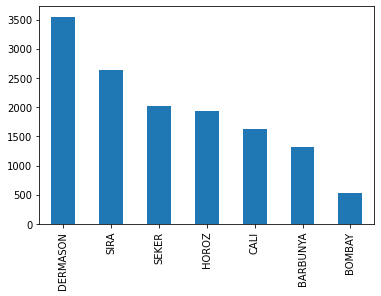

In [ ]:
print(df['Class'].unique())
print(df['Class'].value_counts())
df['Class'].value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(len(df['Class'].value_counts()))

7


In [ ]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9119, 16)
(9119,)
(4492, 16)
(4492,)


In [ ]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21568\2310471181.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21568\2310471181.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
print(y_train[:2])

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Creating a Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=X_train,y=y_train, validation_split=0.2,
          batch_size=128,epochs=100)


Epoch 1/100
57/57 [==============================] - 1s 8ms/step - loss: 1.6916 - accuracy: 0.4521 - val_loss: 1.2420 - val_accuracy: 0.6288
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.7558 - accuracy: 0.7700 - val_loss: 0.4589 - val_accuracy: 0.8481
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 0.3649 - accuracy: 0.8861 - val_loss: 0.2951 - val_accuracy: 0.9095
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 0.2716 - accuracy: 0.9079 - val_loss: 0.2474 - val_accuracy: 0.9200
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.2422 - accuracy: 0.9156 - val_loss: 0.2408 - val_accuracy: 0.9145
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9215 - val_loss: 0.2310 - val_accuracy: 0.9167
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.2175 - accuracy: 0.9234 - val_loss: 0.2257 - val_accuracy: 0.9194
Epoch 8/100
5

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 7)                 119       
                                                                 
Total params: 3,303
Trainable params: 3,303
Non-trainable params: 0
_________________________________________________________________


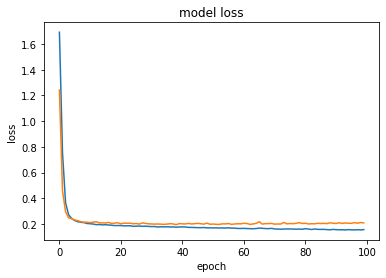

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       400
           1       1.00      1.00      1.00       185
           2       0.94      0.95      0.94       531
           3       0.93      0.92      0.93      1163
           4       0.97      0.93      0.95       642
           5       0.96      0.95      0.96       675
           6       0.86      0.91      0.89       896

    accuracy                           0.93      4492
   macro avg       0.94      0.94      0.94      4492
weighted avg       0.93      0.93      0.93      4492



In [ ]:
# Designing a Neural Network Model activation function = sigmoid
model = Sequential()
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    

In [ ]:
history = model.fit(x=X_train,y=y_train, validation_split=0.2,
            batch_size=128,epochs=100)
        

Epoch 1/100
57/57 [==============================] - 1s 8ms/step - loss: 1.8970 - accuracy: 0.1948 - val_loss: 1.8340 - val_accuracy: 0.2802
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 1.8157 - accuracy: 0.2566 - val_loss: 1.7796 - val_accuracy: 0.2802
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 1.7221 - accuracy: 0.2633 - val_loss: 1.6291 - val_accuracy: 0.4106
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 1.5053 - accuracy: 0.5988 - val_loss: 1.3645 - val_accuracy: 0.6436
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 1.2364 - accuracy: 0.6591 - val_loss: 1.1047 - val_accuracy: 0.6853
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 1.0219 - accuracy: 0.6799 - val_loss: 0.9379 - val_accuracy: 0.7067
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.8941 - accuracy: 0.7114 - val_loss: 0.8366 - val_accuracy: 0.7264
Epoch 8/100
5

In [ ]:
model.summary()
    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 7)                 119       
                                                                 
Total params: 3,303
Trainable params: 3,303
Non-trainable params: 0
_________________________________________________________________


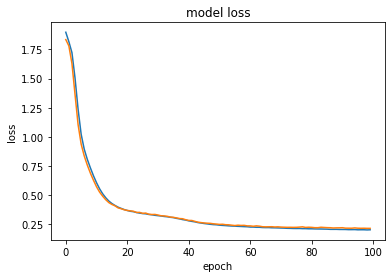

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()
    

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
    

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
    

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       400
           1       1.00      1.00      1.00       185
           2       0.93      0.94      0.93       531
           3       0.90      0.95      0.92      1163
           4       0.96      0.94      0.95       642
           5       0.97      0.94      0.95       675
           6       0.89      0.84      0.86       896

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492



In [ ]:
# Designing a Neural Network Model activation function = tanh
model = Sequential()
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    

In [ ]:
history = model.fit(x=X_train,y=y_train, validation_split=0.2,
            batch_size=128,epochs=100)

Epoch 1/100
57/57 [==============================] - 1s 10ms/step - loss: 1.1314 - accuracy: 0.6833 - val_loss: 0.7651 - val_accuracy: 0.8169
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.6224 - accuracy: 0.8691 - val_loss: 0.4944 - val_accuracy: 0.8969
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.4195 - accuracy: 0.9102 - val_loss: 0.3525 - val_accuracy: 0.9161
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.3195 - accuracy: 0.9209 - val_loss: 0.2910 - val_accuracy: 0.9189
Epoch 5/100
57/57 [==============================] - 0s 5ms/step - loss: 0.2774 - accuracy: 0.9230 - val_loss: 0.2665 - val_accuracy: 0.9128
Epoch 6/100
57/57 [==============================] - 0s 5ms/step - loss: 0.2536 - accuracy: 0.9264 - val_loss: 0.2461 - val_accuracy: 0.9243
Epoch 7/100
57/57 [==============================] - 0s 5ms/step - loss: 0.2417 - accuracy: 0.9239 - val_loss: 0.2379 - val_accuracy: 0.9211
Epoch 8/100


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 7)                 119       
                                                                 
Total params: 3,303
Trainable params: 3,303
Non-trainable params: 0
_________________________________________________________________


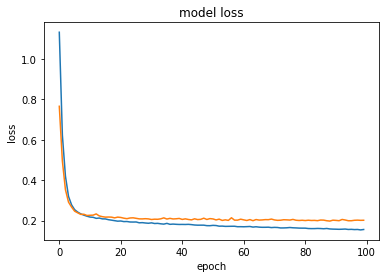

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()
    

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       400
           1       1.00      0.99      1.00       185
           2       0.94      0.94      0.94       531
           3       0.92      0.93      0.93      1163
           4       0.96      0.94      0.95       642
           5       0.96      0.94      0.95       675
           6       0.87      0.88      0.88       896

    accuracy                           0.93      4492
   macro avg       0.94      0.94      0.94      4492
weighted avg       0.93      0.93      0.93      4492

